## 目標網頁：
https://www.foxconn.com/zh-tw/press-center/press-releases/latest-news

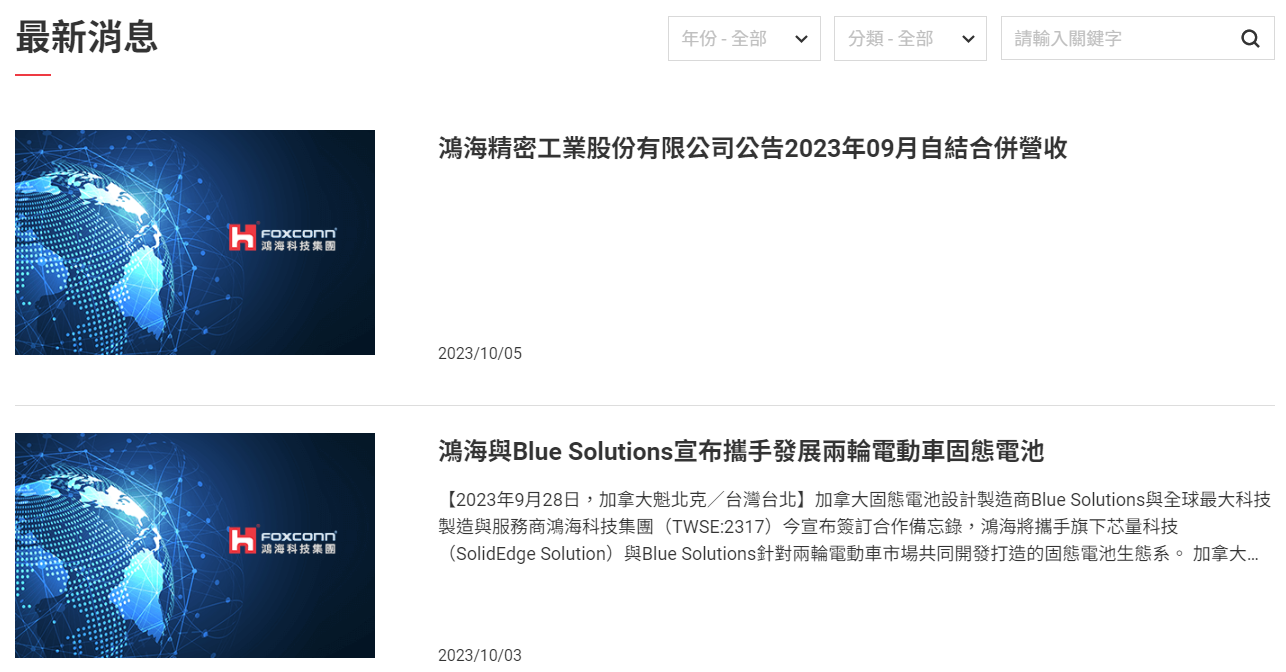

## 輸出結果：
* 鴻海官方新聞稿
    * 發佈日期
    * 新聞標題
    * 新聞內容

## 程式語法：

In [1]:
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
import time
import pandas as pd

# date: 2022/11/03

In [1]:
# driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver = webdriver.Chrome(ChromeDriverManager().install())
contents = {}

def get_topic_and_content(date, link):
    global driver
    
    driver.get(link)
    time.sleep(2)
    
    content = ""

    for text in driver.find_elements(By.XPATH, '//*/p'):
        content += f"{text.text}\n\n"
        
    return [date ,driver.find_element(By.CLASS_NAME, 'title').text, content]

    
def get_links_in_page(page):
    global driver, contents
    driver.get(f"https://www.foxconn.com/zh-tw/press-center/press-releases/latest-news?page={page}")
    time.sleep(5)
    
    link_elements = driver.find_elements(By.CLASS_NAME, 'thumbnail')
    dates = driver.find_elements(By.CLASS_NAME, 'date')
    
    all_links_in_page = {}
    date_count = 0
    
    for link_element in link_elements:
        all_links_in_page[dates[date_count].text] = link_element.find_element(By.XPATH, 'a').get_attribute('href')
        date_count += 1
    
    for date, link in all_links_in_page.items():
        print(date)
        print(link)
        contents[link] = get_topic_and_content(date, link)
    
for page in range(1, 24):
    get_links_in_page(page)

In [ ]:
result_dates = []
result_titles = []
result_contents = []


for link, datas in contents.items():
    result_dates.append(datas[0])
    result_titles.append(datas[1])
    result_contents.append(datas[2])
    
    
result = pd.DataFrame({'date': result_dates, 'title': result_titles, 'content': result_contents})
display(result)

In [ ]:
result.to_csv('foxconn_web_data_20230107.csv', index=False)